In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [171]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('c:/Users/HP/Desktop/mnist/',one_hot=True)

Extracting c:/Users/HP/Desktop/mnist/train-images-idx3-ubyte.gz
Extracting c:/Users/HP/Desktop/mnist/train-labels-idx1-ubyte.gz
Extracting c:/Users/HP/Desktop/mnist/t10k-images-idx3-ubyte.gz
Extracting c:/Users/HP/Desktop/mnist/t10k-labels-idx1-ubyte.gz


Here data conntains train, test, validation sets separatley. you can find each set labels as follows

In [172]:
print('train labels',len(data.train.labels))
print('test labels',len(data.test.labels))
print('validation labels',len(data.validation.labels))

train labels 55000
test labels 10000
validation labels 5000


In [173]:
import matplotlib.pyplot as plt
plt.ion()

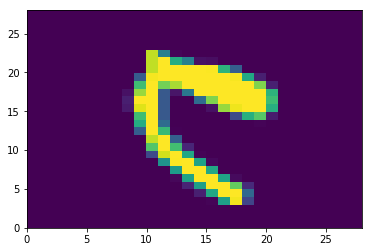

In [174]:
d = data.train.images[3].reshape(28,28)
plt.pcolormesh(d)

In [175]:
data.test.labels[0:5]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

In [176]:
data.test.cls = np.array([label.argmax() for label in data.test.labels])
data.test.cls[0:5]

array([7, 2, 1, 0, 4], dtype=int64)

In [177]:
image_size = 28
image_size_flat = image_size * image_size 
image_shape = (image_size ,image_size )
num_cls = 10

In [178]:
x = tf.placeholder(tf.float32,[None,image_size_flat])
y_true = tf.placeholder(tf.float32,[None,num_cls])
y_true_cls = tf.placeholder(tf.int64,[None])

In [179]:
w = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros(10))

In [180]:
logits = tf.matmul(x,w)+b
y_pred = tf.nn.relu(logits)
y_pred_cls = tf.arg_max(y_pred,dimension=1)

In [181]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=y_true)
cost = tf.reduce_mean(cross_entropy)

In [182]:
optimizer = tf.train.RMSPropOptimizer(0.001).minimize(cost)

In [183]:
correct_pred = tf.equal(y_pred_cls,y_true_cls)

In [184]:
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32))

In [185]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
batch_size = 1000


In [186]:
def optimize(num_iterations):
    for i in range(num_iterations):
        x_batch,y_true_batch = data.train.next_batch(batch_size)
        feed_dict_train = {x:x_batch,y_true:y_true_batch}
        sess.run(optimizer,feed_dict=feed_dict_train)
        

In [187]:
feed_dict_test = {x : data.test.images, y_true: data.test.labels, y_true_cls: data.test.cls}

In [188]:
def print_accuracy():
    accu = sess.run(accuracy,feed_dict=feed_dict_test)
    print("acc on test:{0:.1%}".format(accu))


acc on test:9.8%


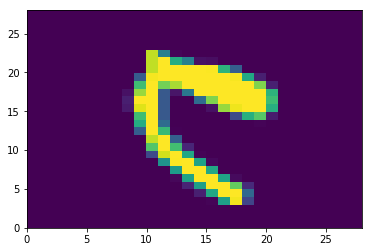

In [189]:
#no optimization here
print_accuracy()
d = data.train.images[3].reshape(28,28)
plt.pcolormesh(d)

acc on test:42.2%


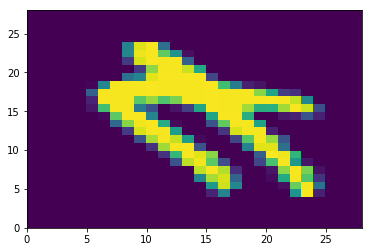

In [190]:
optimize(1)
print_accuracy()
d = data.train.images[3].reshape(28,28)
print(plt.pcolor(d))

acc on test:63.7%


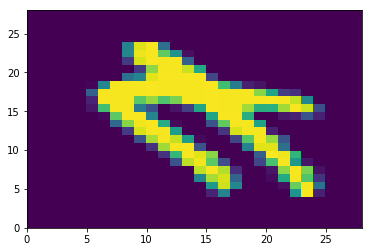

In [191]:
optimize(10)
print_accuracy()
d = data.train.images[3].reshape(28,28)
plt.pcolormesh(d)

acc on test:82.3%


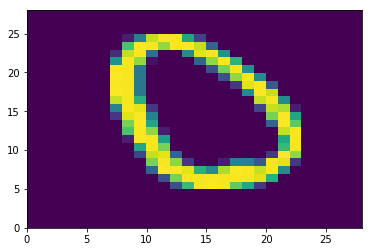

In [192]:
optimize(100)
print_accuracy()
d = data.train.images[3].reshape(28,28)
plt.pcolormesh(d)

acc on test:92.4%


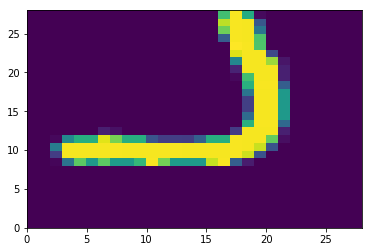

In [193]:
optimize(1000)
print_accuracy()
d = data.train.images[3].reshape(28,28)
plt.pcolormesh(d)

acc on test:92.5%


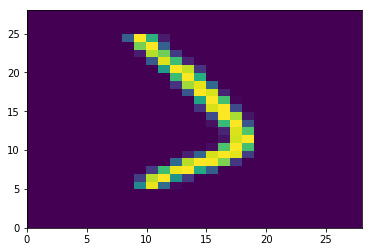

In [194]:
optimize(1500)
print_accuracy()
d = data.train.images[3].reshape(28,28)
plt.pcolormesh(d)

Here i used GradientOptimizer @ first and i got 82% which is not good so i tried adagradeoptimizer n got 84% still not good and i tried RMSoptimizer n i got 92.8% which is pretty good. you can tweak the model for higher accuracy.

TensorShape([Dimension(None), Dimension(10)])